# Homework 3 - Machine Learning
### ist1103000, Pedro Lima     ; ist1103179, Diogo Costa (Group 029)

#### II. Programming
### 1)

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
wine = pd.read_csv("winequality-red.csv", sep=";")
  
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
input_vars = wine.drop("quality", axis=1)
output_vars = wine["quality"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_vars, output_vars, stratify=output_vars, train_size=0.8, random_state=0)
print("#training obs =",len(X_train),"\n#testing obs =",len(X_test))

#training obs = 1279 
#testing obs = 320


In [4]:
from sklearn.neural_network import MLPRegressor


all_residuals = []

for it in range(10):
    MLP_regressor = MLPRegressor(random_state=(it+1), hidden_layer_sizes=(10,10), activation="relu", early_stopping=True, validation_fraction=0.2)
    MLP_regressor.fit(X_train, y_train)

    y_pred_test = MLP_regressor.predict(X_test)

    residual = abs(y_pred_test - y_test)
    all_residuals.extend(residual)


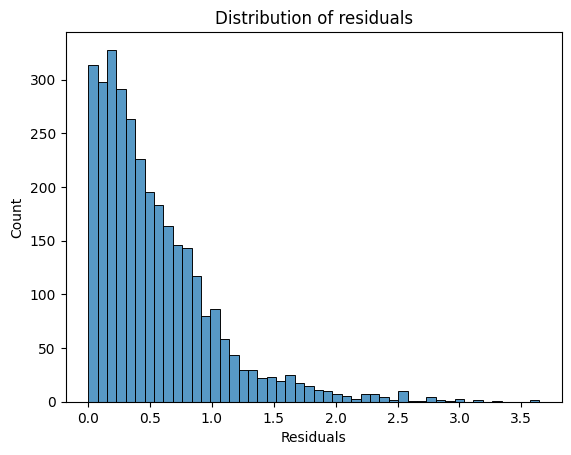

In [5]:
import seaborn as sns

plot = sns.histplot(data= all_residuals).set(title="Distribution of residuals", xlabel="Residuals")



### 2)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_no_round = 0
MAE_round = 0
RMSE_no_round = 0       # used in 3)

for it in range(10):
    MLP_regressor = MLPRegressor(random_state=(it+1), hidden_layer_sizes=(10,10), activation="relu", early_stopping=True, validation_fraction=0.2)
    MLP_regressor = MLP_regressor.fit(X_train, y_train)
    y_pred_test = MLP_regressor.predict(X_test)
    y_pred_test_round = [10 if x>10 else 1 if x<1 else round(x) for x in y_pred_test]

    MAE_no_round += mean_absolute_error(y_test, y_pred_test)
    MAE_round += mean_absolute_error(y_test, y_pred_test_round)
    RMSE_no_round += mean_squared_error(y_test, y_pred_test, squared=False)

MAE_no_round /= 10
MAE_round /= 10
RMSE_no_round /= 10

print("MAE without bounding and rounding: ", MAE_no_round)
print("MAE with bounding and rounding: ", MAE_round)

MAE without bounding and rounding:  0.5437511706983347
MAE with bounding and rounding:  0.49281250000000004


As is possible to verify above, we can assess that rounding our estimates reduces the MAE when compared to the MLP learnt in the previous question.

### 3)

In [7]:
rmse_early_stop = RMSE_no_round

n_iterations = [20, 50, 100, 200]

rmse_it = []
y_pred_test2 = [0]*y_test.size

for it in n_iterations:
    rmse = 0
    for it2 in range(10):
        MLP_regressor2 = MLPRegressor(random_state=(it2+1), hidden_layer_sizes=(10,10), activation="relu", early_stopping=False, max_iter=it)
        MLP_regressor2.fit(X_train, y_train)
        y_pred_test2 = MLP_regressor2.predict(X_test)

        rmse += mean_squared_error(y_test, y_pred_test2, squared=False)

    y_pred_test2 /= 10
    rmse /= 10
    rmse_it.append(rmse)

print("Early stop RMSE: ", rmse_early_stop)
for i in range(4):
    print(str(n_iterations[i]) + " iterations RMSE: " + str(rmse_it[i]))

Early stop RMSE:  0.7285645002031444
20 iterations RMSE: 1.5741537078556829
50 iterations RMSE: 0.9296215581878041
100 iterations RMSE: 0.7495674512113977
200 iterations RMSE: 0.697002682560151


### 4)

By analysing the results above, we are able to infer that early stopping has a lower RMSE, and an overall better performance, when compared to having a well-defined number of iterations (especially when that number doesn't exceed 100 iterations). This may be the case mainly because of overfitting, since the regressor with early stopping stops training when the validation score is not improving, leading to a better generalization capacity when compared to a fixed number of iterations, which relies too much on the training set. It is also possible to note that, as the number of iterations increases, the RMSE doesn't decrease significantly, meaning that more iterations doesn't necessarily mean better performance.